In [24]:
import os
import numpy as np
import pandas as pd
from shutil import copyfile


In [25]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('./images/',
                                              target_size=(28,28),
                                              subset='training')

val_generator = datagen.flow_from_directory('./images/',
                                            target_size=(28,28),
                                            subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [16]:
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

K.clear_session()
model_ckpt = ModelCheckpoint('BrailleNet.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(28,28,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(26,activation='softmax')(x)
model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              validation_data=val_generator,
                              epochs=666,
                              callbacks=[model_ckpt,reduce_lr,early_stop],
                              verbose=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4272\1871965747.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/666
39/39 [==============================] - 20s 463ms/step - loss: 3.2912 - accuracy: 0.0465 - val_loss: 3.2395 - val_accuracy: 0.0641 - lr: 0.0010
Epoch 2/666
39/39 [==============================] - 2s 50ms/step - loss: 3.1676 - accuracy: 0.0841 - val_loss: 2.9997 - val_accuracy: 0.1122 - lr: 0.0010
Epoch 3/666
39/39 [==============================] - 2s 49ms/step - loss: 2.6641 - accuracy: 0.2204 - val_loss: 2.3678 - val_accuracy: 0.3109 - lr: 0.0010
Epoch 4/666
39/39 [==============================] - 2s 50ms/step - loss: 2.0317 - accuracy: 0.3878 - val_loss: 1.7931 - val_accuracy: 0.4744 - lr: 0.0010
Epoch 5/666
39/39 [==============================] - 2s 49ms/step - loss: 1.5871 - accuracy: 0.5264 - val_loss: 1.3684 - val_accuracy: 0.6058 - lr: 0.0010
Epoch 6/666
39/39 [==============================] - 2s 50ms/step - loss: 1.1679 - accuracy: 0.6506 - val_loss: 0.9285 - val_accuracy: 0.7372 - lr: 0.0010
Epoch 7/666
39/39 [==============================] - 2s 48ms/step - 

39/39 [==============================] - 2s 47ms/step - loss: 0.0721 - accuracy: 0.9880 - val_loss: 0.1852 - val_accuracy: 0.9455 - lr: 1.0000e-04
Epoch 54/666
39/39 [==============================] - 2s 48ms/step - loss: 0.0684 - accuracy: 0.9880 - val_loss: 0.1786 - val_accuracy: 0.9615 - lr: 1.0000e-04
Epoch 55/666
39/39 [==============================] - 2s 47ms/step - loss: 0.0761 - accuracy: 0.9840 - val_loss: 0.1949 - val_accuracy: 0.9583 - lr: 1.0000e-04
Epoch 56/666
39/39 [==============================] - 2s 46ms/step - loss: 0.0668 - accuracy: 0.9904 - val_loss: 0.2432 - val_accuracy: 0.9487 - lr: 1.0000e-04
Epoch 57/666
39/39 [==============================] - 2s 48ms/step - loss: 0.0732 - accuracy: 0.9872 - val_loss: 0.1777 - val_accuracy: 0.9519 - lr: 1.0000e-04
Epoch 58/666
39/39 [==============================] - 2s 47ms/step - loss: 0.0676 - accuracy: 0.9848 - val_loss: 0.1793 - val_accuracy: 0.9712 - lr: 1.0000e-04
Epoch 59/666
39/39 [==============================] -

39/39 [==============================] - 2s 46ms/step - loss: 0.0588 - accuracy: 0.9936 - val_loss: 0.2088 - val_accuracy: 0.9583 - lr: 1.0000e-07
Epoch 105/666
39/39 [==============================] - 2s 47ms/step - loss: 0.0576 - accuracy: 0.9912 - val_loss: 0.1750 - val_accuracy: 0.9679 - lr: 1.0000e-07
Epoch 106/666
39/39 [==============================] - 2s 46ms/step - loss: 0.0668 - accuracy: 0.9912 - val_loss: 0.1975 - val_accuracy: 0.9615 - lr: 1.0000e-07
Epoch 107/666
39/39 [==============================] - 2s 50ms/step - loss: 0.0528 - accuracy: 0.9928 - val_loss: 0.2563 - val_accuracy: 0.9423 - lr: 1.0000e-07
Epoch 108/666
39/39 [==============================] - 2s 47ms/step - loss: 0.0521 - accuracy: 0.9944 - val_loss: 0.2240 - val_accuracy: 0.9519 - lr: 1.0000e-08
Epoch 109/666
39/39 [==============================] - 2s 47ms/step - loss: 0.0676 - accuracy: 0.9904 - val_loss: 0.2307 - val_accuracy: 0.9551 - lr: 1.0000e-08
Epoch 110/666
39/39 [===========================

In [17]:
model = load_model('BrailleNet.h5')
acc = model.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4272\3710093233.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val_generator)[1]


model accuracy: 0.9423


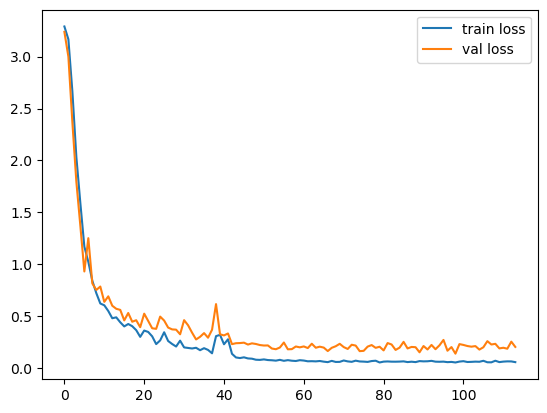

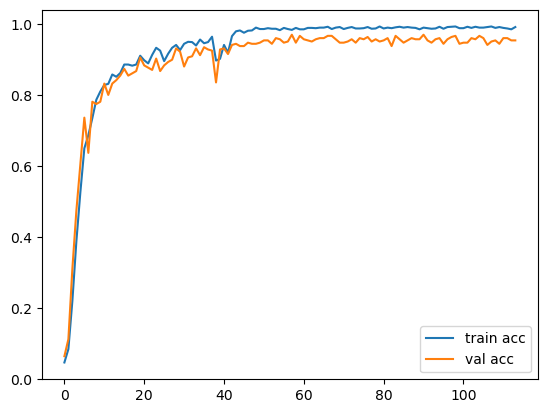

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from keras.models import load_model

# Load the trained model
loaded_model = load_model('BrailleNet.h5')  # Replace with your saved model file path


In [23]:
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
from PIL import Image

# Load the trained model
loaded_model = load_model('BrailleNet.h5')  # Replace with the actual path to your trained model

# Load and preprocess the unseen image
img_path = 'x.jpg'  # Replace with the path to your unseen image

# Load the image using Pillow (PIL)
img = Image.open(img_path)
img = img.resize((28, 28))  # Assuming the model expects 28x28 images

# Convert the image to a NumPy array
img_array = np.array(img)
img_array = img_array / 255.0  # Normalize the pixel values (assuming the model was trained with normalized data)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make predictions
predictions = loaded_model.predict(img_array)

# Assuming that the predictions are one-hot encoded, you can get the predicted class index
predicted_class_index = np.argmax(predictions)

# You may want to map the class index back to the corresponding Braille character
# For example, if class 0 corresponds to 'a', class 1 to 'b', and so on:
braille_characters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
predicted_braille_character = braille_characters[predicted_class_index]

print(f"Predicted Braille character: {predicted_braille_character}")


1/1 [==============================] - 0s 86ms/step
Predicted Braille character: c
